# Effects of Wildfire Smoke on Forest Productivity in Central Canada.
## Data Aquisition and Scrubbing - Function Library
Program Author: Andrew Loeppky <br>
Supervising Professor: Dr. Ian Mckendry <br>
Date: May 2020


In [38]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
import scipy
import datetime
import time

In [39]:
### read in data

# test data (JFM in 2020)
wask_aod_test_10 = pd.read_csv('C:/Users/Owner/Wildfire_Smoke_Mckendry/code/Waskesiu_lev10.csv', skiprows=6)
wask_aod_test_15 = pd.read_csv('C:/Users/Owner/Wildfire_Smoke_Mckendry/code/Waskesiu_lev15.csv', skiprows=6)
'''
# full length sets (1993-2020)
wask_aod_10 = pd.read_csv('C:/Users/Owner/Wildfire_Smoke_Mckendry/data/Waskesiu10.csv', skiprows=6)
wask_aod_15 = pd.read_csv('C:/Users/Owner/Wildfire_Smoke_Mckendry/data/Waskesiu15.csv', skiprows=6)
wask_aod_20 = pd.read_csv('C:/Users/Owner/Wildfire_Smoke_Mckendry/data/Waskesiu20.csv', skiprows=6)

# total AOD, whatever that means
wask_tot_10 = 0
wask_tot_15 = 0
wask_tot_20 = 0 

# test longer dataset
long_test = pd.read_csv('C:/Users/Owner/Wildfire_Smoke_Mckendry/data/Waskesiu_long_test10.csv', skiprows=6)
''';

In [40]:

### Get rid of -999.0 values
def replace_999(dataset):
    '''replaces default -999 with numpy NaN
    '''
    dataset.replace(-999.0,np.nan,inplace=True)


In [41]:
### Drop empty columns
def drop_empty(dataset):
    '''if column name contains the string "Empty", drop it
    '''
    for index in dataset.columns:
        if 'Empty' in index:
            dataset.drop([index],axis=1,inplace=True) 

    return dataset
    

In [42]:
### Properly reformat date and time scipy datetime
def reformat_datetime(dataset):
    '''generates a datetime column for aeronet formatted raw data, drops old columns
    '''
    dataset['year'] = dataset['Date(dd:mm:yyyy)'].str[6:11]
    dataset['month'] = dataset['Date(dd:mm:yyyy)'].str[3:5]
    dataset['day'] = dataset['Date(dd:mm:yyyy)'].str[0:2]

    dataset['hour'] = dataset['Time(hh:mm:ss)'].str[0:2]
    dataset['minute'] = dataset['Time(hh:mm:ss)'].str[3:5]
    dataset['second'] = dataset['Time(hh:mm:ss)'].str[6:8]

    dataset['datetime'] = pd.to_datetime(dataset[['year','month','day','hour','minute','second']])
    dataset.drop(['Date(dd:mm:yyyy)','Time(hh:mm:ss)','year','month','day','hour','minute','second'],axis=1,inplace=True)
    
    return dataset
    

In [43]:
### Call all the scrubbing routines 
def scrub_aeronet(dataset):
    '''calls data cleaning functions and outputs a clean run of aeronet data ready for plotting
    '''
    replace_999(dataset)
    dataset = drop_empty(dataset)
    dataset = reformat_datetime(dataset)


In [44]:
### Plotting function
def plot_aod(dataset):
    fig, ax = plt.subplots(1,1, figsize=(20,8))
    
    for index in dataset.columns:
        if index[0:3] == 'AOD':
            ax.scatter(dataset["datetime"],dataset[index], label=index, alpha=0.5)
    
    ax.set_title("Test Time Series of AOD at All Available $\lambda$")
    ax.set_xlabel("Date")
    ax.set_ylabel("AOD")
    ax.legend(loc='best')
    
    plt.savefig('AOD_timeseries.png',dpi=150)

In [45]:
### timer decorator function from the internet
def timeit(method):
    '''
    https://www.laurivan.com/braindump-use-a-decorator-to-time-your-python-function/
    '''

    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        elapsed = te - ts

        # print(f'time to generate plot: {elapsed}s')
        return result, elapsed

    return timed
    

In [46]:
@timeit
def main(dataset):
    scrub_aeronet(dataset)
    plot_aod(dataset)


(None, 2.0203747749328613)

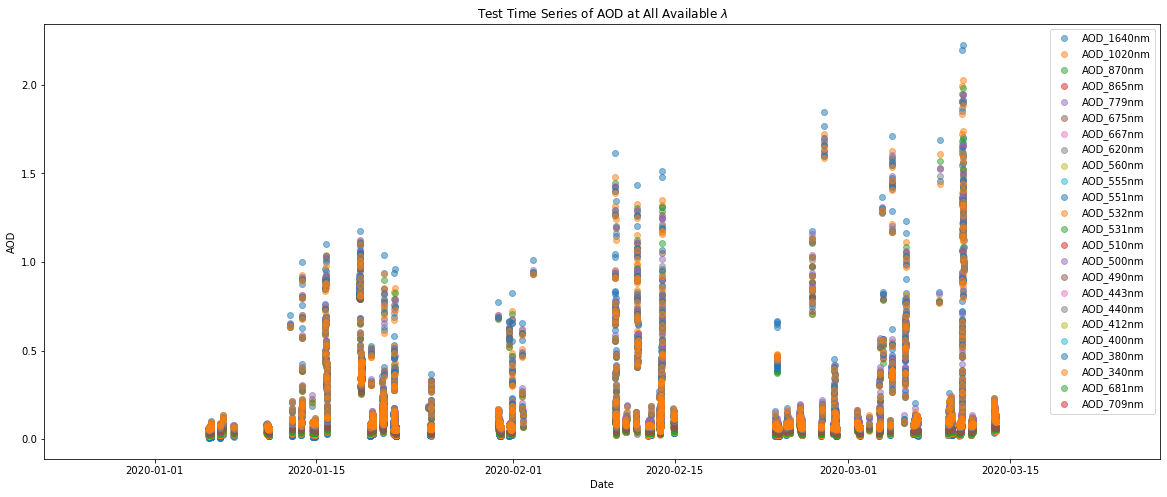

In [47]:
main(wask_aod_test_10)